
--- Method 1: Remove Rows with Missing Values ---
Accuracy: 0.8888888888888888
Confusion Matrix:
[[45  4]
 [ 6 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.90      0.85      0.88        41

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



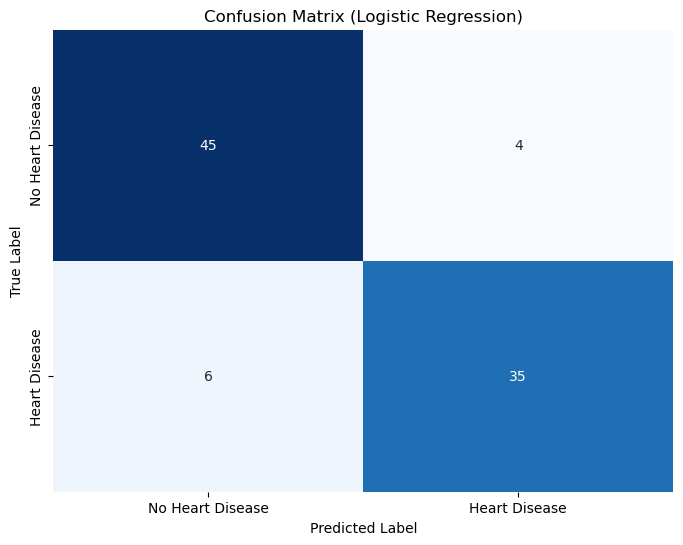

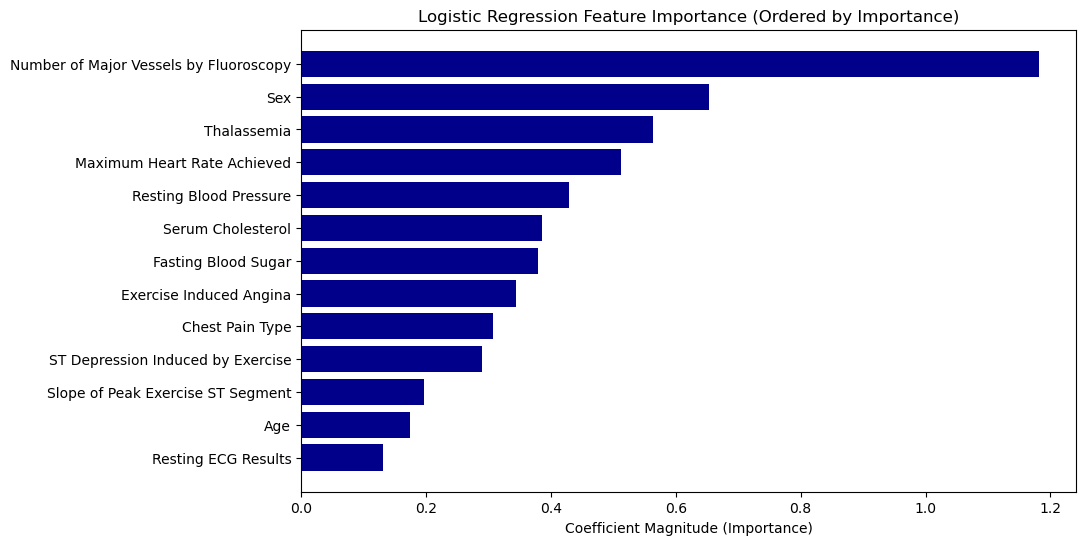

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting the confusion matrix

# Load the Cleveland Heart Disease dataset from UCI repository
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)
df = pd.DataFrame(heart_disease.data.features)
df['num'] = heart_disease.data.targets

# Simplify 'num' to binary classification
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Replace feature names with real-world meanings (without parentheses)
df.columns = [
    'Age',
    'Sex',
    'Chest Pain Type',
    'Resting Blood Pressure',
    'Serum Cholesterol',
    'Fasting Blood Sugar',
    'Resting ECG Results',
    'Maximum Heart Rate Achieved',
    'Exercise Induced Angina',
    'ST Depression Induced by Exercise',
    'Slope of Peak Exercise ST Segment',
    'Number of Major Vessels by Fluoroscopy',
    'Thalassemia',
    'target'
]

# Function to build and evaluate the Logistic Regression model
def evaluate_model(X_train, X_test, y_train, y_test):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr_model.predict(X_test_scaled)

    # Confusion Matrix and Classification Report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Calculate accuracy
    accuracy = lr_model.score(X_test_scaled, y_test)

    return conf_matrix, class_report, accuracy, lr_model

# --- Method 1: Remove Rows with Missing Values --- (this is the better method compared with using mean, median, and mode values)
df_dropna = df.dropna()
X_dropna = df_dropna.drop('target', axis=1)
y_dropna = df_dropna['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)

# Evaluate model with removed missing values
conf_matrix, class_report, accuracy_dropna, lr_model_dropna = evaluate_model(X_train, X_test, y_train, y_test)

print("\n--- Method 1: Remove Rows with Missing Values ---")
print(f"Accuracy: {accuracy_dropna}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Get feature importance from the model's coefficients for Method 1 (Remove Missing Values)
importance = np.abs(lr_model_dropna.coef_[0])

# Sort the feature importance in descending order
sorted_idx = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_idx]
sorted_feature_names = X_dropna.columns[sorted_idx]

# Plot feature importance for Method 1 (Remove Missing Values)
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance, color='darkblue')
plt.xlabel("Coefficient Magnitude (Importance)")
plt.title("Logistic Regression Feature Importance (Ordered by Importance)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()